# Customer Segmentation

### Introduction

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. In business-to-business marketing, a company might segment customers according to a wide range of factors, including:
- Industry
- Number of employees
- Products previously purchased
- Location
- Customer's role in purchasing decisions
- Customer's budget
- Customer's needs
- Customer's goals
- Customer's challenges
- Customer's objections or hesitations


### Business Problem

A mall has collected information about its customers and would like to segment them into groups based on their annual income and spending score. The mall will use this information to develop targeted marketing strategies and personalized customer engagement.

### Business Value

Customer segmentation is a powerful tool for understanding customers and their needs. It allows companies to tailor their products, services, marketing campaigns, and customer engagement strategies to meet the needs of different groups of customers. This leads to increased customer satisfaction and loyalty, which in turn leads to increased profitability.

### Data Understanding

The dataset contains information about customers of a mall. The dataset has 200 rows and 5 columns.


### Data Preparation

- Data cleaning: The dataset does not contain any missing values or duplicate rows, so no data cleaning is required.
- Data transformation: The dataset contains categorical variables, so these need to be transformed into numerical variables before they can be used in machine learning models.
- Data scaling: The dataset contains numerical variables with different ranges, so these need to be scaled before they can be used in machine learning models.

### Modeling

K-Means clustering is used to segment the customers into groups based on their annual income and spending score.

### Evaluation

The K-Means clustering algorithm is evaluated using the following metrics:
- Silhouette score: The silhouette score measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is very similar to its own cluster and very dissimilar to other clusters. A score of -1 indicates that the object is very dissimilar to its own cluster and very similar to other clusters. A score of 0 indicates that the object is equally similar to its own cluster and other clusters.
- Calinski-Harabasz score: The Calinski-Harabasz score is a measure of how well separated the clusters are from each other. The Calinski-Harabasz score ranges from 0 to 1, where a score of 1 indicates that the clusters are completely separated from each other and a score of 0 indicates that the clusters are completely overlapping.
- Davies-Bouldin score: The Davies-Bouldin score is a measure of how well separated the clusters are from each other. The Davies-Bouldin score ranges from 0 to 1, where a score of 1 indicates that the clusters are completely separated from each other and a score of 0 indicates that the clusters are completely overlapping.

# Importing Libraries

In [12]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [13]:
#loading data
data = pd.read_csv('./Mall_Customers.csv')
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
#checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
#checking data description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


# Data Preparation

In [16]:
#cleaning data
data.dropna()
data.drop_duplicates()
#renaming columns
data.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

#Mapping Gender data where 0 is Male and 1 is Female
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})

In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200.0,0.56,0.497633,0.0,0.00,1.0,1.00,1.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0
cluster,200.0,1.40,1.449311,0.0,0.00,1.0,3.00,4.0


# Data Visualization

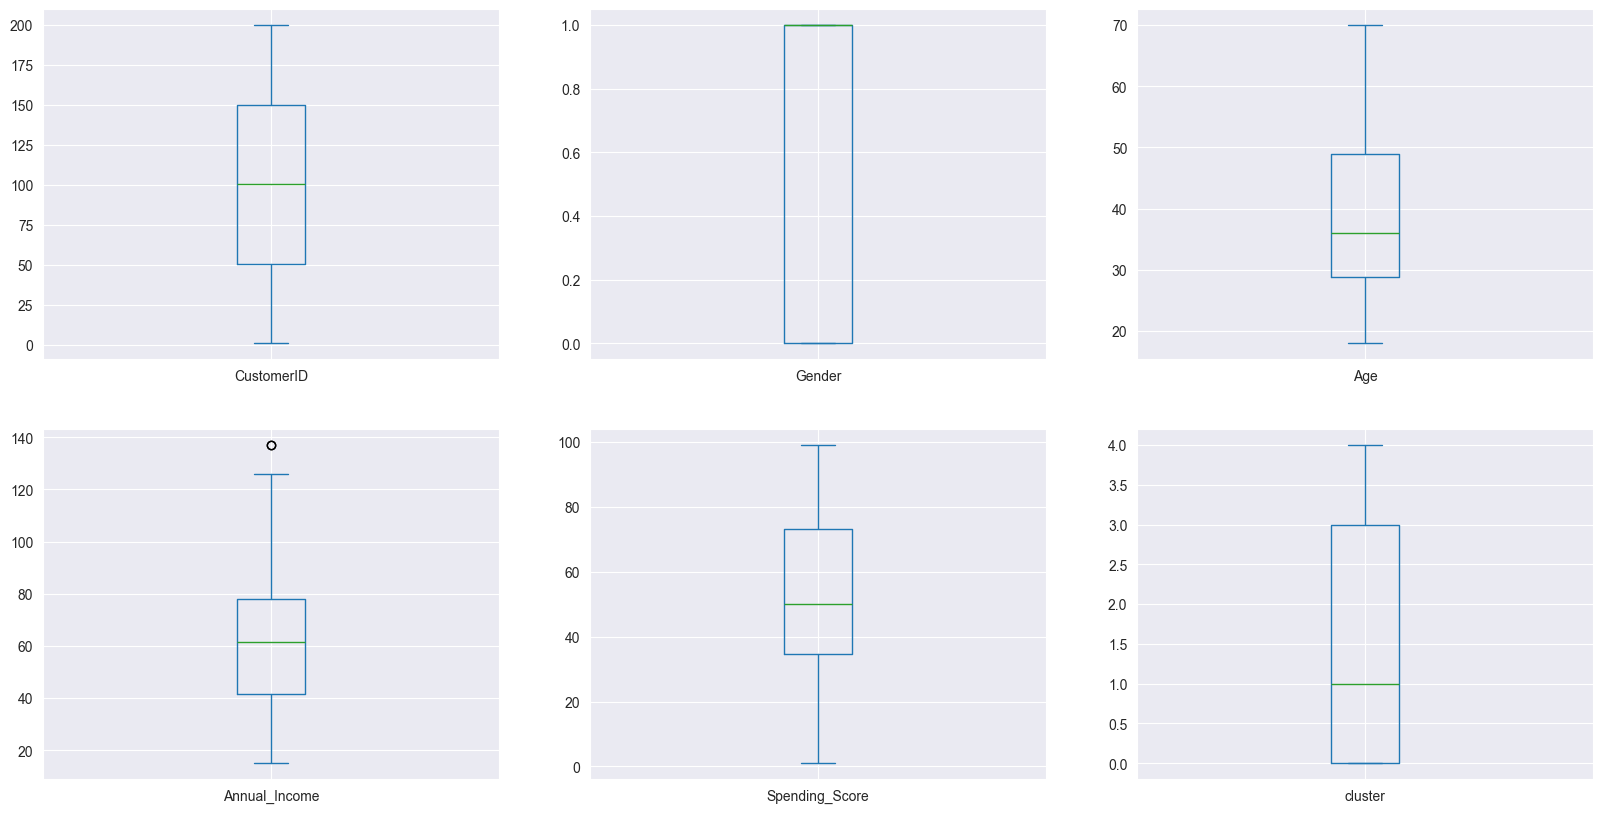

In [36]:
# Boxplot to check outliers
data.plot(kind='box',subplots=True,figsize=(20,10),layout=(2,3))
plt.show()

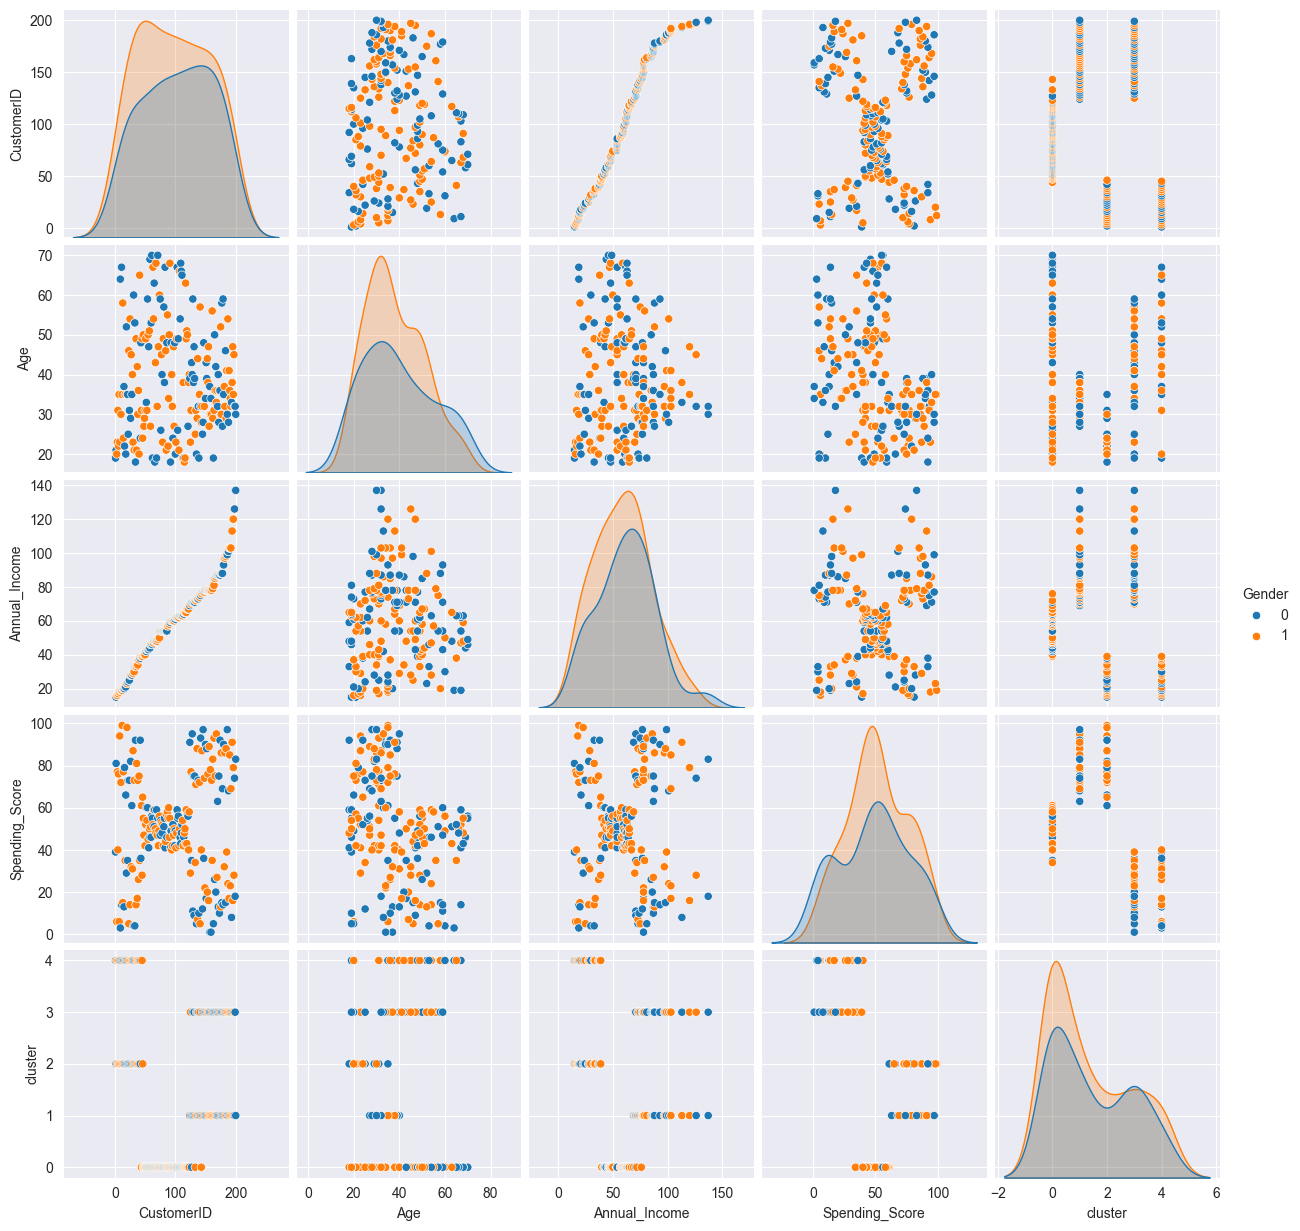

In [37]:
# Pairplot to check the distribution of data
sns.pairplot(data, hue='Gender')
plt.show()

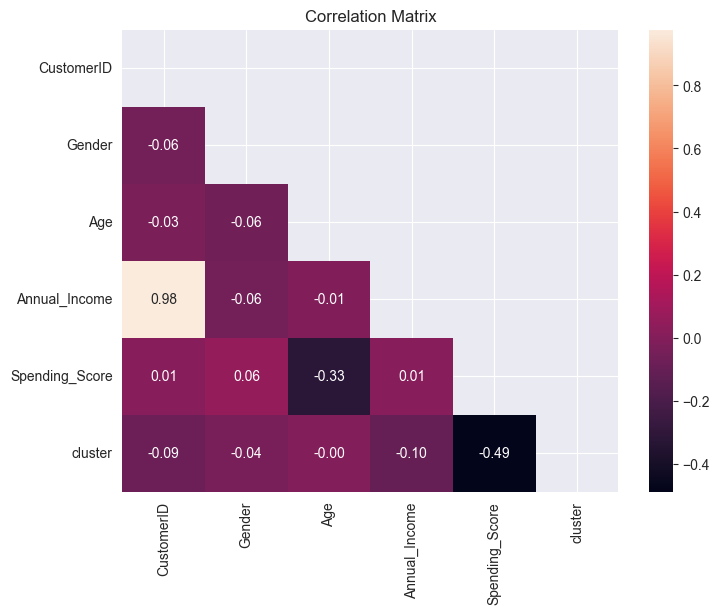

In [34]:
# Correlation Matrix
plt.figure(figsize=(8,6))
# Generate a mask for the upper triangle to only show the lower triangle
mask = np.triu(np.ones_like(data.corr(),dtype=bool))
sns.heatmap(data.corr(),annot=True,mask=mask,fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Modeling 
# K-Means Clustering

#### **Elbow Method**

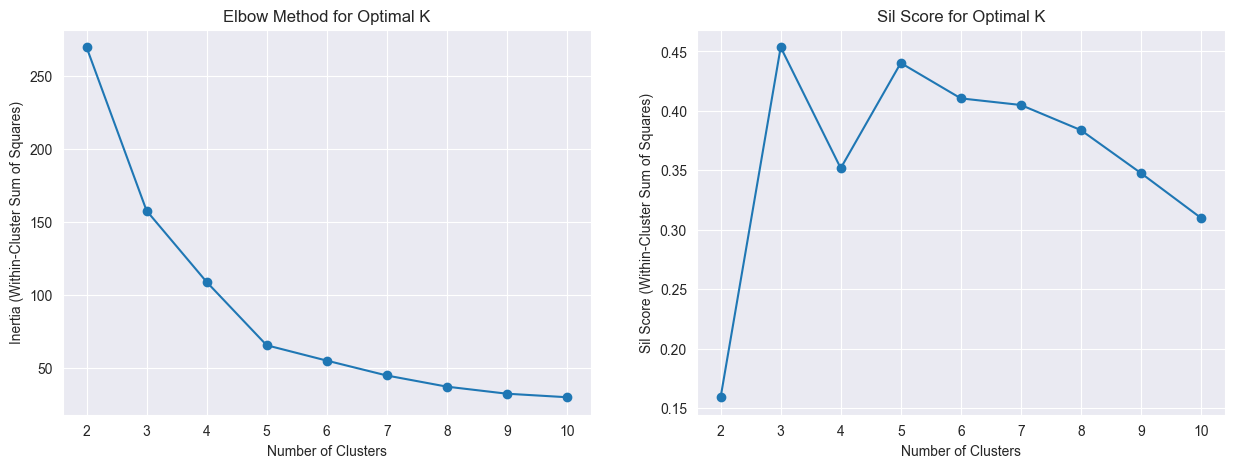

In [32]:
# Create a DataFrame with the selected features
features = data[['Annual_Income', 'Spending_Score']]

# Scale features
features_scaled = StandardScaler().fit_transform(features)

# Create a range of clusters to test
cluster_range = range(2, 11)

# Create lists to store inertia and silhouette scores
inertia = []
sil = []

# Fit K-Means for each cluster number and calculate inertia
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
    sil.append(silhouette_score(data, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')

# Plot the silhouette score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, sil, marker='o')
plt.title('Sil Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Sil Score (Within-Cluster Sum of Squares)')
plt.show()


### Applying K-means Clustering with K=5

#### **K-Means Clustering**
From the elbow method, the optimal number of clusters is 5 and the silhouette score is highest at 5 without overfitting the data, we will use 5 clusters for our K-Means clustering model.

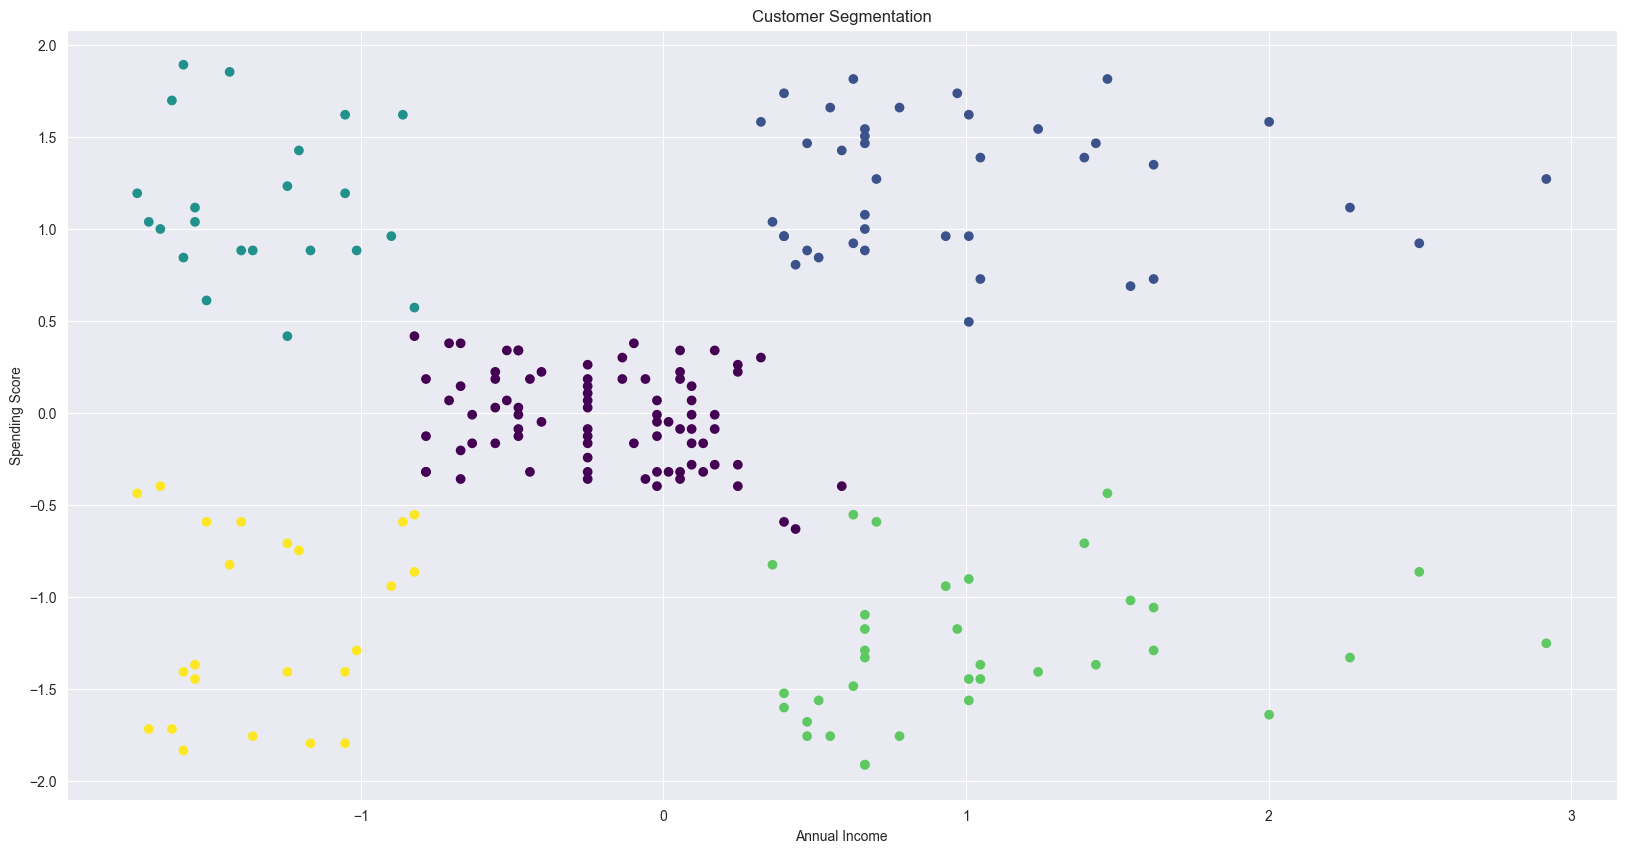

In [33]:
# Create a DataFrame with the selected features & scale features
features = data[['Annual_Income', 'Spending_Score']]
features_scaled = StandardScaler().fit_transform(features)

# Choose the number of clusters
num_clusters = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, init='k-means++')
labels_pred = kmeans.fit_predict(features_scaled)
data['cluster'] = labels_pred

# Visualize the clusters on a scatter plot
plt.figure(figsize=(20,10))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=data['cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Evaluation 

In [136]:
print(silhouette_score(features_scaled, labels_pred))
print(calinski_harabasz_score(features_scaled, labels_pred))
print(davies_bouldin_score(features_scaled, labels_pred))

0.5546571631111091
248.64932001536357
0.5722356162263352


#### **Silhouette Score**
The Silhouette Score obtained is 0.55, indicating a moderate level of separation between clusters. While it's acceptable, there is room for improvement to achieve stronger cluster distinctions.

#### **Calinski-Harabasz Score**
The Calinski-Harabasz Score obtained is 248.65, which is considered acceptable. This score suggests a good balance between intra-cluster similarity and inter-cluster differences, contributing to well-defined clusters.

#### **Davies-Bouldin Score**
The Davies-Bouldin Score obtained is 0.57, signaling an acceptable level of compactness and separation among clusters. It suggests that the clusters are reasonably well-defined and distinct from each other.


# Visualization of Clusters 

In [29]:
# Create a DataFrame with the scaled features
features_scaled = pd.DataFrame(features_scaled, columns=['Annual_Income', 'Spending_Score'])
# Add the cluster assignment to the DataFrame
segment_1 = data[data['cluster'] == 0]
segment_2 = data[data['cluster'] == 1]
segment_3 = data[data['cluster'] == 2]
segment_4 = data[data['cluster'] == 3]
segment_5 = data[data['cluster'] == 4]

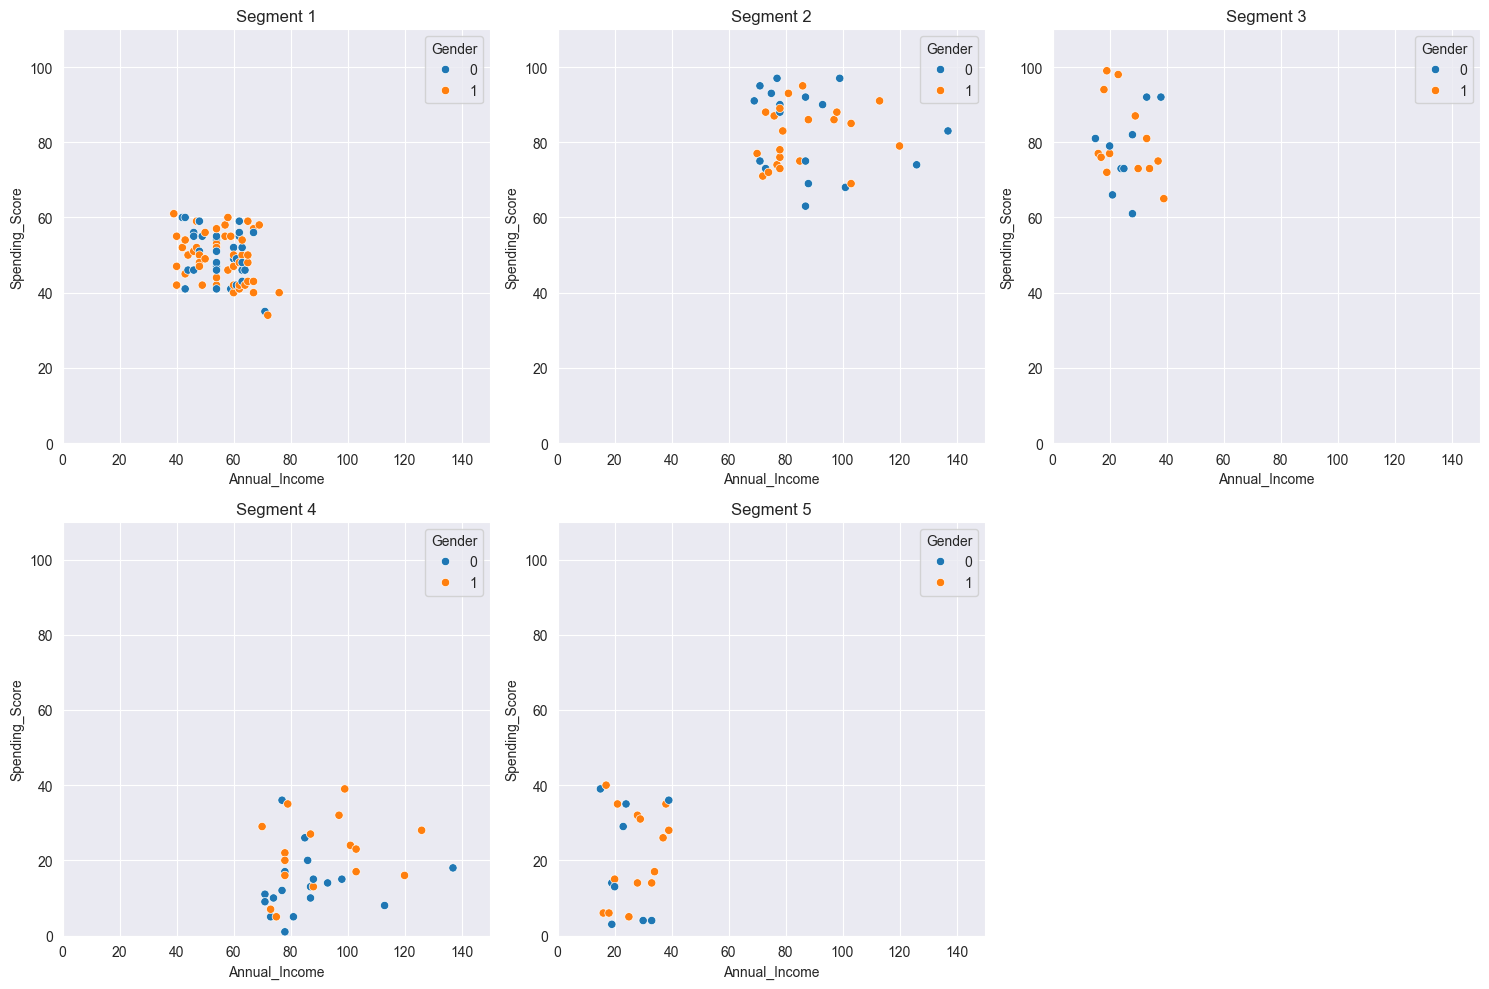

In [30]:
# Create a list with the segments
segment_list = [segment_1, segment_2, segment_3, segment_4, segment_5]

# Create a figure and subplot
fig, axes = plt.subplots(2,3, figsize=(15,10))
axes[1][2].set_visible(False)

# Loop through segment_list and axes
for i, k in zip(segment_list, range(1, 6)):
    # Use the appropriate subplot
    plt.subplot(2, 3, k)

    # Create a scatter plot for each segment
    sns.scatterplot(data=i, x='Annual_Income', y='Spending_Score', hue='Gender')

    # Set axis limits
    plt.xlim(0, 150)
    plt.ylim(0, 110)

    # Set a title for each subplot
    plt.title(f'Segment {k}')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

# Descriptive Statistics of Clusters

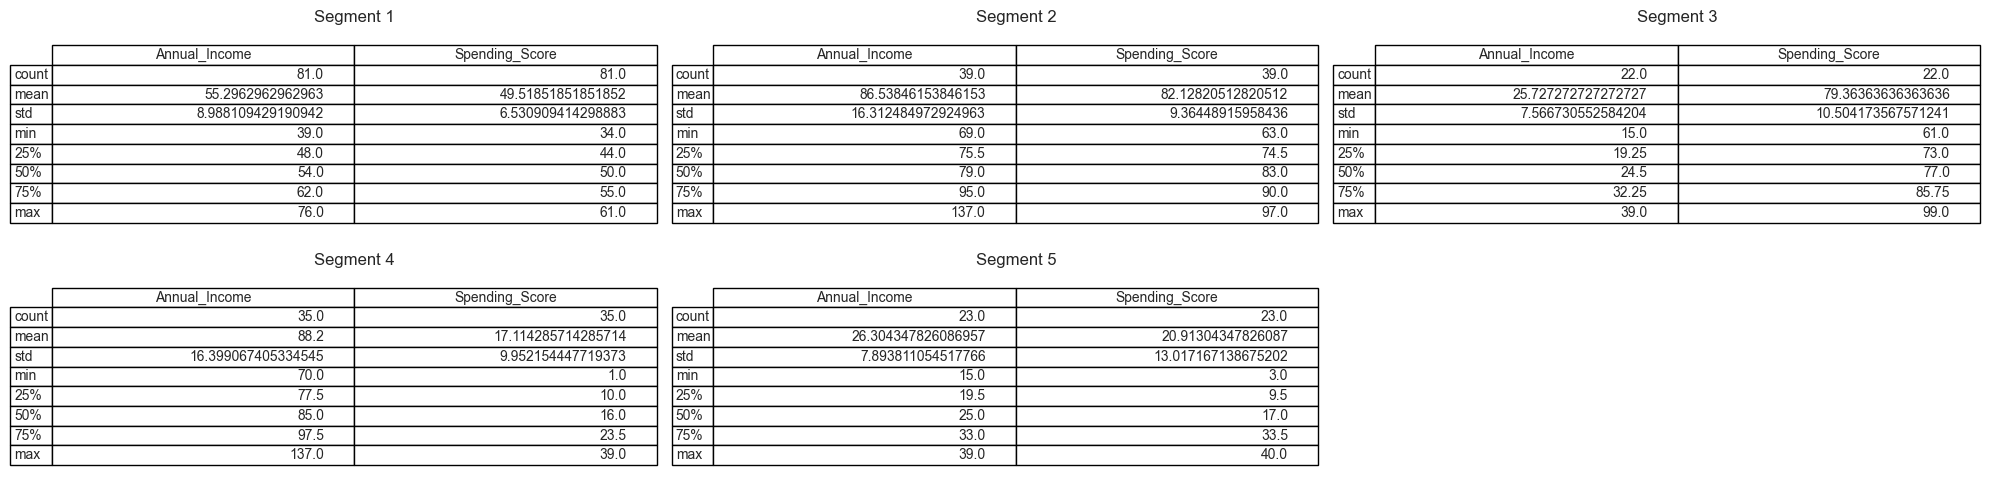

In [31]:
# Create a figure and subplot
fig, axes = plt.subplots(2,3, figsize=(20,5))
axes[1][2].set_visible(False)

# Loop through segment_list and axes
for i, k in zip(segment_list, range(1, 7)):
    # Use the appropriate subplot
    plt.subplot(2, 3, k)

    # Display descriptive statistics using describe
    descriptive_stats = i[['Annual_Income', 'Spending_Score']].describe()

    # Plot a table with pandas plotting
    table = plt.table(cellText=descriptive_stats.values,
                      colLabels=descriptive_stats.columns,
                      rowLabels=descriptive_stats.index,
                      loc='center')

    # Hide the axes
    plt.axis('off')

    # Set a title for each subplot
    plt.title(f'Segment {k}')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

# Result & Conclusion

### Customer Segmentation Results Documentation

#### **Segment 1:**
- **Customer Count:** 81
- **Gender Distribution:** 59.3% Female, 40.7% Male
- **Age:** Mean 42.7 years, Range 18 to 70 years
- **Annual Income:** Mean &#36;55,296, Range &#36;39,000 to &#36;76,000
- **Spending Score:** Mean 49.5, Range 34 to 61
- **Cluster Assignment:** Cluster 0

#### **Segment 2:**
- **Customer Count:** 39
- **Gender Distribution:** 53.8% Female, 46.2% Male
- **Age:** Mean 32.7 years, Range 27 to 40 years
- **Annual Income:** Mean &#36;86,538, Range &#36;69,000 to 137,000
- **Spending Score:** Mean 82.1, Range 63 to 97
- **Cluster Assignment:** Cluster 1

#### **Segment 3:**
- **Customer Count:** 22
- **Gender Distribution:** 59.1% Female, 40.9% Male
- **Age:** Mean 25.3 years, Range 18 to 35 years
- **Annual Income:** Mean &#36;25,727, Range &#36;15,000 to &#36;39,000
- **Spending Score:** Mean 79.4, Range 61 to 99
- **Cluster Assignment:** Cluster 2

#### **Segment 4:**
- **Customer Count:** 35
- **Gender Distribution:** 45.7% Female, 54.3% Male
- **Age:** Mean 41.1 years, Range 19 to 59 years
- **Annual Income:** Mean &#36;88,200, Range &#36;70,000 to &#36;137,000
- **Spending Score:** Mean 17.1, Range 1 to 39
- **Cluster Assignment:** Cluster 3

#### **Segment 5:**
- **Customer Count:** 23
- **Gender Distribution:** 60.9% Female, 39.1% Male
- **Age:** Mean 45.2 years, Range 19 to 67 years
- **Annual Income:** Mean &#36;26,304, Range &#36;15,000 to &#36;39,000
- **Spending Score:** Mean 20.9, Range 3 to 40
- **Cluster Assignment:** Cluster 4

### In conclusion, we have successfully segmented the customers into 5 groups based on their annual income and spending score. The segments are as follows::
- **Segment 1:** Moderate income, moderate spending, diverse age group.
- **Segment 2:** High income, high spending, younger age group.
- **Segment 3:** Low to moderate income, high spending, younger age group.
- **Segment 4:** High income, low spending, diverse age group.
- **Segment 5:** Low to moderate income, low spending, older age group.

These segments provide valuable insights for targeted marketing strategies and personalized customer engagement. Adjust business approaches based on the characteristics of each segment to maximize customer satisfaction and profitability.
